In [16]:
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.6/site-packages")
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import astropy.coordinates as coord
from astropy.io import ascii

In [2]:
data = ascii.read("analysis_window_clean_altaz_FOV_2018.04.11.csv")

In [3]:
ra = coord.Angle(data['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['Decl']*u.degree)

In [4]:
galactic_longitudes = np.arange(start=0, stop=360, step=0.1)
galactic_latitudes = [0] * len(galactic_longitudes)
icrs = SkyCoord(galactic_longitudes, galactic_latitudes, unit="deg", frame="galactic").icrs
gal_ra = icrs.ra
gal_ra = gal_ra.wrap_at(180*u.degree)
gal_dec = icrs.dec

In [5]:
gal_center_long = 180.
gal_center_lat = 0.
cena_long = 309.51589568
cena_lat = 19.41727350
icrs2 = SkyCoord(gal_center_long, gal_center_lat, unit="deg", frame="galactic").icrs
gal_center_ra = icrs2.ra
gal_center_ra = gal_center_ra.wrap_at(180*u.degree)
gal_center_dec = icrs2.dec

In [6]:
icrs3 = SkyCoord(cena_long, cena_lat, unit="deg", frame="galactic").icrs
#cena_ra = icrs3.ra
#cena_ra = cena_ra.wrap_at(180*u.degree)
#cena_dec = icrs3.dec
ra_gc=299.3*u.degree
dec_gc=-28.72* u.degree
ra_cena = 201.3625*u.degree
dec_cena = -43.0192*u.degree
c2 = SkyCoord(ra=ra_cena, dec=dec_cena, frame='icrs')
cena_ra = c2.ra.wrap_at(180 * u.deg).radian
cena_dec = c2.dec.radian

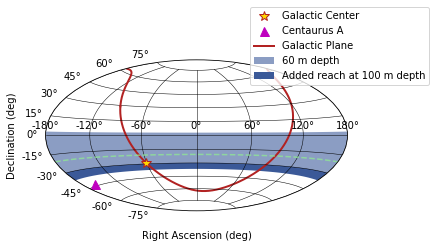

In [7]:
c = SkyCoord(ra=ra_gc, dec=dec_gc, frame='icrs')
fig = plt.figure()
ax = fig.add_subplot(111, projection="hammer")
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian
ax.grid(color='k', linestyle='solid', linewidth=0.5)
r = 90
#theta = np.arange(0,2*np.pi,0.1)
x = np.array([-np.pi,np.pi,np.pi,-np.pi,-np.pi])
y = np.array([0.05,0.05,-0.36,-0.36,0.05])
y2 = np.array([0.05,0.05,-0.52,-0.52,0.05])
y3 = np.array([-0.52,-0.52,-0.64,-0.64,-0.52])
#ax.plot(x,y)

plt.fill(x,y2,label='60 m depth', facecolor='#8b9dc3',alpha=1)
plt.fill(x,y3,label='Added reach at 100 m depth',alpha=1,facecolor='#3b5998')
plt.scatter(ra_rad,dec_rad)
plt.plot(ra_rad, dec_rad, '*',color='gold',markersize=11,mec='firebrick',label='Galactic Center')
ax.plot(cena_ra, cena_dec,'^',markersize=9,color='m',label='Centaurus A')
plt.plot(gal_ra.radian[0:2970], -gal_dec.radian[0:2970],color='firebrick',linewidth=2,label='Galactic Plane',zorder=1)
plt.plot(gal_ra.radian[2980:], -gal_dec.radian[2980:],color='firebrick',linewidth=2,zorder=2)
#ax.plot(x+np.pi/6,y+np.pi/6)
#ax.plot(x-np.pi/2,y-np.pi/2);
plt.plot([-np.pi, np.pi], [-0.36, -0.36], '--',color='lightgreen', alpha=0.7)#15 m depth

legend = ax.legend(loc='upper right')
legend.get_frame().set_facecolor('#ffe4c4')
plt.legend( bbox_to_anchor=(.66,.8))
ax.set_ylabel('Declination (deg)') #give it a title
ax.set_xlabel('Right Ascension (deg)',labelpad=20) #give it a title
ax.axes.get_xaxis().set_ticks([-np.pi/3, -2*np.pi/3, -np.pi,0,np.pi/3, 2*np.pi/3, np.pi])
# plt.annotate('15 m depth',xy=(np.pi, -0.36), xycoords='data',xytext=(.87, .3), textcoords='figure fraction',arrowprops=dict(arrowstyle="->", color='royalblue'),horizontalalignment='right', verticalalignment='top')
#ax.annotate('annotate', xy=(3, 0), xytext=(11, 4))
#plt.gca().set_aspect('0.8', adjustable='box')
plt.tight_layout()
# ax.show()

In [43]:
np.cos(np.radians(np.rad2deg(-0.36)+90))

0.3522742332750901

In [12]:
np.cos(abs(-np.pi/2+cena_dec))

-0.6822434007434198

# Example: plot sun, moon position over time

In [23]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
m33 = SkyCoord.from_name('Cen A')  
bear_mountain = EarthLocation(lat=-90*u.deg, lon=45*u.deg, height=390*u.m)
# utcoffset = -4*u.hour  # Eastern Daylight Time
utcoffset = 0

time = Time('2015-01-01 23:00:00') - utcoffset
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))  
"M33's Altitude = {0.alt:.2}".format(m33altaz)  

"M33's Altitude = 4.3e+01 deg"

In [24]:
midnight = Time('2015-12-31 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 7, 100)*u.hour
m33altazs = m33.transform_to(AltAz(obstime=midnight+delta_midnight, location=bear_mountain)) 

In [27]:
from astropy.coordinates import get_sun
delta_midnight = np.linspace(0, 365, 1000)*u.d
times = midnight + delta_midnight
altazframe = AltAz(obstime=times, location=bear_mountain)
sunaltazs = get_sun(times).transform_to(altazframe)
m33altazs = m33.transform_to(altazframe)  

UnitConversionError: 'deg' (angle) and 'd' (time) are not convertible

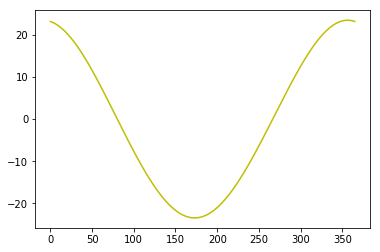

In [35]:
plt.plot(delta_midnight, sunaltazs.alt, color='y', label='Sun')  
plt.scatter(delta_midnight, m33altazs.alt, c=m33altazs.az, label='M33', lw=0, s=8)  
# plt.fill_between(delta_midnight.to('day').value, -20, 90, sunaltazs.alt < -0*u.deg, color='0.5', zorder=0)  
# plt.fill_between(delta_midnight.to('day').value, -20, 90, sunaltazs.alt < -18*u.deg, color='k', zorder=0)  
# plt.colorbar().set_label('Azimuth [deg]')  
# plt.legend(loc='upper left')  
# plt.xlim(-12, 12)  
# plt.xticks(np.arange(13)*2 -12)  
# plt.ylim(0, 90)  
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Altitude [deg]')  

In [22]:
u.deg.to('', equivalencies=u.dimensionless_angles())  

0.017453292519943295